In [1]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset
cat_path = "PetImages/Cat"
dog_path = "PetImages/Dog"

data = []
labels = []

IMAGE_SIZE = 64
SAMPLES = 2000   # use 2000 cats + 2000 dogs

In [3]:
# Load Cat images
for img_name in os.listdir(cat_path)[:SAMPLES]:
    try:
        img = cv2.imread(os.path.join(cat_path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        data.append(img.flatten())
        labels.append(0)  # Cat
    except:
        pass

# Load Dog images
for img_name in os.listdir(dog_path)[:SAMPLES]:
    try:
        img = cv2.imread(os.path.join(dog_path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        data.append(img.flatten())
        labels.append(1)  # Dog
    except:
        pass

In [4]:
# Convert to Numpy
X = np.array(data)
y = np.array(labels)

print("Total samples:", X.shape[0])
print("Feature size:", X.shape[1])

Total samples: 3987
Feature size: 4096


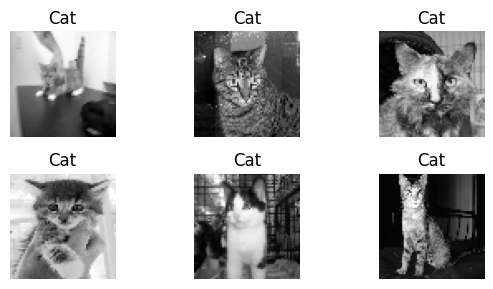

In [6]:
# Data Visualization (show sample image)
plt.figure(figsize=(6,3))

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X[i].reshape(64,64), cmap='gray')
    plt.title("Cat" if y[i]==0 else "Dog")
    plt.axis("off")

plt.tight_layout()
plt.show()

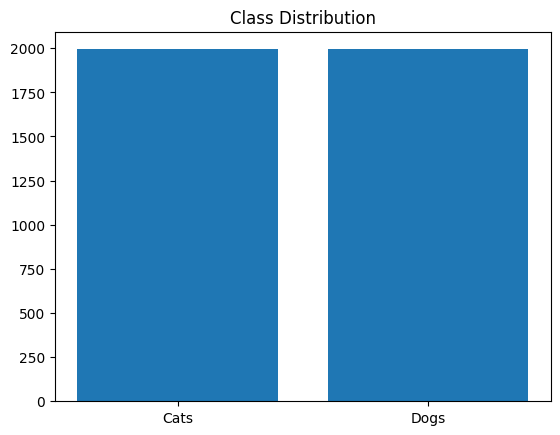

In [7]:
# class distribution
plt.bar(["Cats", "Dogs"], [sum(y==0), sum(y==1)])
plt.title("Class Distribution")
plt.show()

In [8]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Train SVM Model
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(C=10)

In [11]:
# Prediction and Accuracy
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.6190476190476191


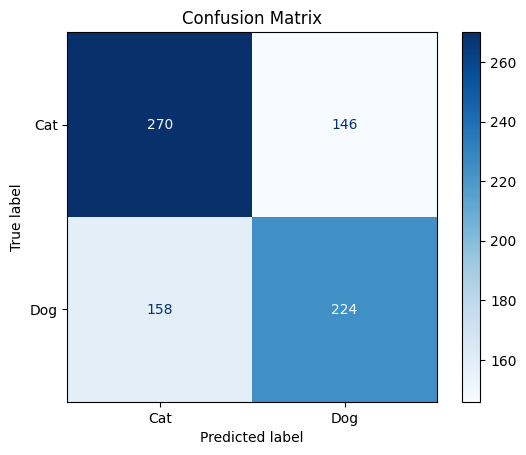

In [12]:
# Confusion matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()